<a href="https://colab.research.google.com/github/HongSeongMo/Airbnb/blob/main/Copy_of_airbnb_lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5강. 매출예측 모델 학습: 선형회귀와 의사결정 나무

학습 데이터 읽기

In [258]:
import pandas as pd

In [300]:
X_train.columns

Index(['index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,       9,      10,      11,      12,      13,      14,
            15,      16,      17,      18,      19,      20,      21,      22,
            23,      24,      25,      26,      27,      28,      29,      30,
            31,      32,      33,      34,      35,      36,      37,      38,
            39,      40,      41,      42,      43,      44,      45,      46,
            47,      48,      49,      50,      51],
      dtype='object')

모델 학습

In [260]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

선형회귀모델(Linear Regression)
*   사이킷런 공식 문서 :

In [261]:
# 모델 생성
model_linear = LinearRegression() #선형회귀 모델

In [262]:
# # 모델 학습
# model_linear.fit(X_train, y_train)

In [263]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load your data into X_train and y_train

# Impute missing values in X_train
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

# Create a new LinearRegression model
model_linear = LinearRegression()

# Fit the model to the imputed data
model_linear.fit(X_train, y_train)

LinearRegression()

의사결정나무(Decision tree regression)
*   싸이킷런 공식 문서:

In [264]:
# 모델 생성
model_tree = DecisionTreeRegressor(max_leaf_nodes=100) #의사결정나무 모델

In [265]:
# 모델 학습
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=100)

모델 성능 평가

매출 예측

In [266]:
y_pred_linear = model_linear.predict(X_train)

y_pred_linear

array([[ 267.82497272],
       [  62.54076762],
       [ 164.21547073],
       ...,
       [-111.8888397 ],
       [ -74.39032123],
       [ 733.10124461]])

In [267]:
y_pred_linear = pd.DataFrame(y_pred_linear, columns= ["pred_linear"])

y_pred_linear

,pred_linear
0,267.824973
1,62.540768
2,164.215471
3,-77.018021
4,58.565172
...,...
61486,-138.733592
61487,-431.510341
61488,-111.888840
61489,-74.390321


In [268]:
y_pred_tree = model_tree.predict(X_train)
y_pred_tree

array([0., 0., 0., ..., 0., 0., 0.])

In [269]:
y_pred_tree = pd.DataFrame(y_pred_tree, columns= ['pred_tree'])
y_pred_tree


,pred_tree
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
61486,0.0
61487,0.0
61488,0.0
61489,0.0


In [270]:
y_train = pd.concat([y_train, y_pred_linear, y_pred_tree], axis=1)

y_train

,revenue,pred_linear,pred_tree
0,0.0,267.824973,0.0
1,0.0,62.540768,0.0
2,0.0,164.215471,0.0
3,0.0,-77.018021,0.0
4,0.0,58.565172,0.0
...,...,...,...
61486,0.0,-138.733592,0.0
61487,0.0,-431.510341,0.0
61488,0.0,-111.888840,0.0
61489,0.0,-74.390321,0.0


test 데이터 비교 : 실제 vs 예측

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15,10)

<Axes: xlabel='revenue', ylabel='pred_linear'>

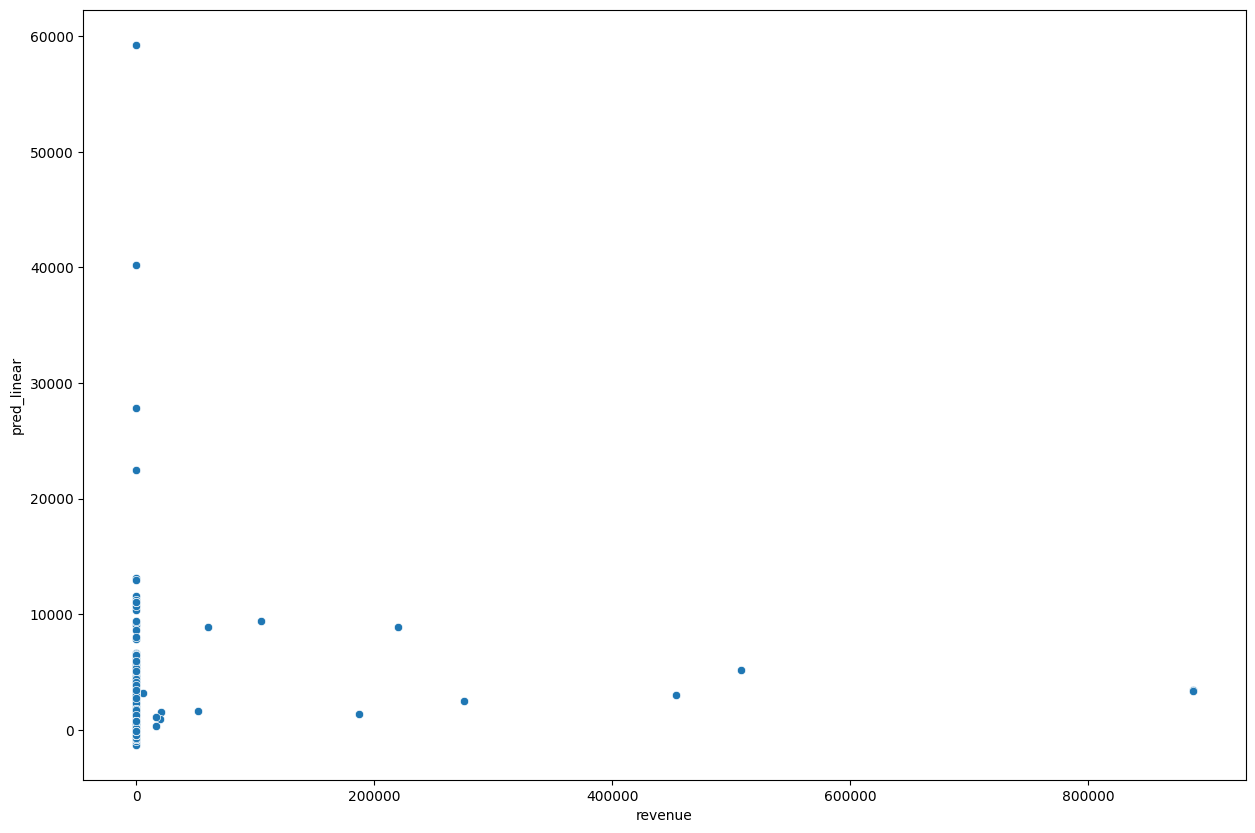

In [272]:
sns.scatterplot(data=y_train,
                x = 'revenue',
                y = 'pred_linear')

<Axes: xlabel='revenue', ylabel='pred_tree'>

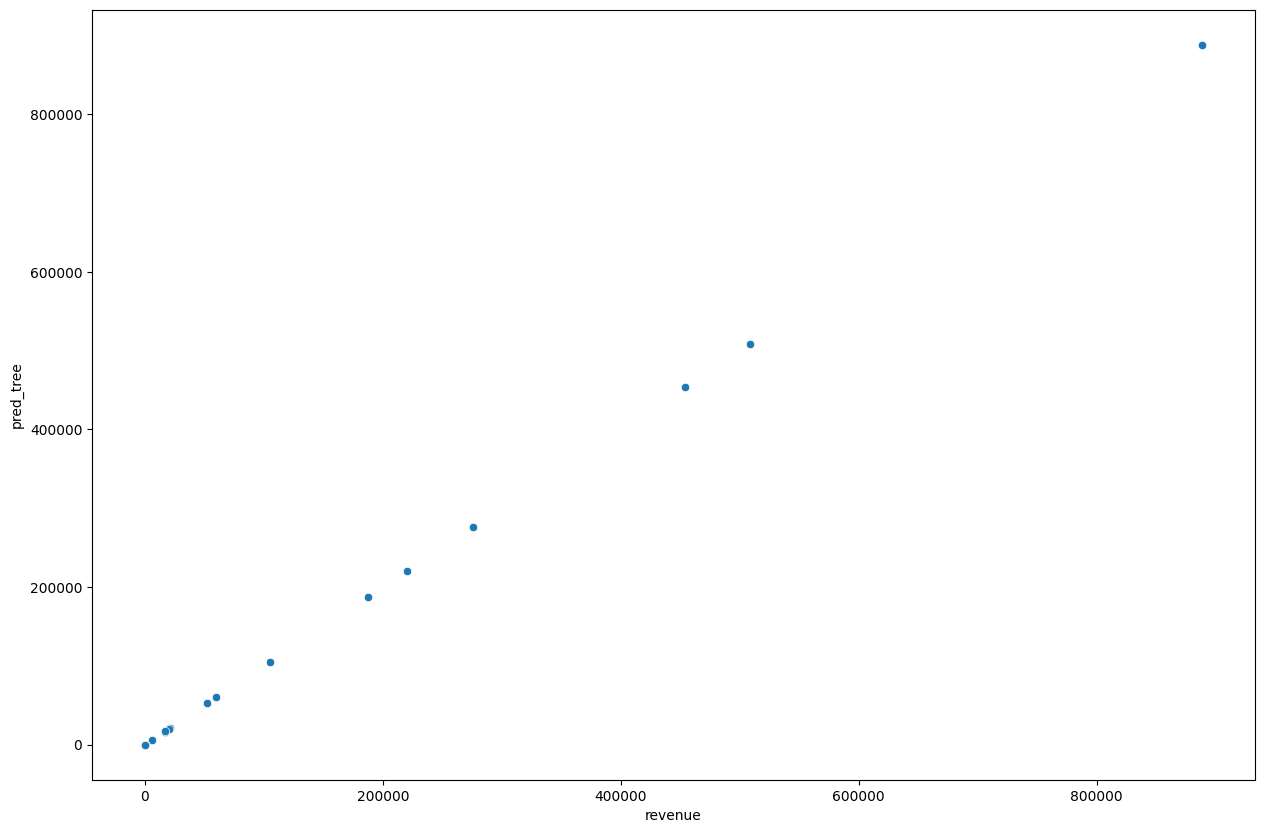

In [273]:
sns.scatterplot(data=y_train,
                x = 'revenue',
                y = 'pred_tree')

MAE(Mean Absolute Error)
*   정의 : 오차 절대값의 평균
*   단위 : 예측값의 단위와 동일(의미 해석이 직관적임)
*   의미 : 예측값이 실제값과 벗어나는 정도의 평균
*   값이 작을수록 예측이 정확. 즉, 모델의 성능이 좋음
*   예) MAE가 10,000원이면, 모델의 예측결과가 실제값으로부터 평균적으로 만원정도 벗어난다고 해석

In [274]:
from sklearn.metrics import mean_absolute_error

In [275]:
mean_absolute_error(y_train.revenue, y_train.pred_linear)

248.89768143805986

In [276]:
mean_absolute_error(y_train.revenue, y_train.pred_tree)

0.0

MAPE(Median Absolute Percentage Error)
*   정의 : 퍼센티지 에러 절대값의 중위값
*   단위 : 퍼센트(%)
    *   서로 다른 예측모델의 성능을 비교할 수 있어, 범용적인 장점이 있음
*   의미 : 예측 오차율의 중간값
*   값이 작을수록 예측이 정확함. 즉, 모델 성능이 좋음
*   예)MAPE가 10%이면, 모델이 예측한 결과들 중 절반은 오차율이 10% 안쪽임

In [277]:
import numpy as np
# define mape
def mape(actual, pred):
    mape = (np.abs(pred - actual)/ actual).median() *100
    return mape

In [278]:
mape(y_train.revenue, y_train.pred_linear)

inf

In [279]:
mape(y_train.revenue, y_train.pred_tree)

0.0

Error 히스토그램
*   목적 : 예측값의 에러 분포를 확인

In [280]:
y_train['error_linear'] = np.abs(y_train['pred_linear'] - y_train['revenue'])
y_train['error_tree'] = np.abs(y_train['pred_tree'] - y_train['revenue'])

In [281]:
y_train.error_linear.describe()

count     61491.000000
mean        248.897681
std        5984.446863
min           0.001257
25%          55.652182
50%         120.372542
75%         225.761130
max      884786.737315
Name: error_linear, dtype: float64

In [282]:
y_train.error_tree.describe()

count    61491.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: error_tree, dtype: float64

In [283]:
y_train['error_linear'] = np.log10(y_train['error_linear'])
y_train['error_tree'] = np.log10(y_train['error_tree'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


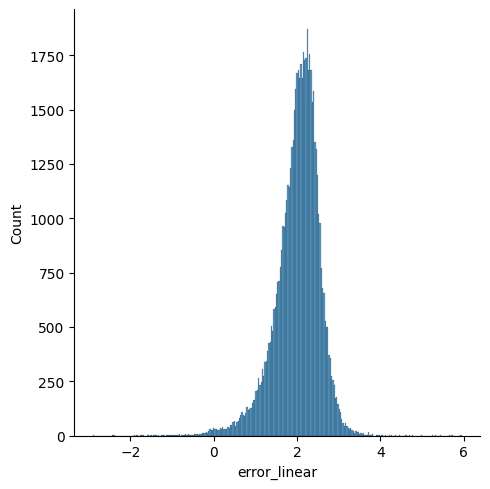

In [284]:
sns.displot(data = y_train, x = 'error_linear')

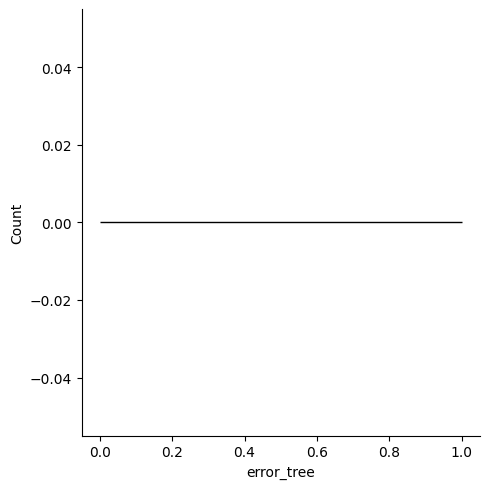

In [285]:
sns.displot(data = y_train, x = 'error_tree')

모델 해석 : 선형 회귀

회귀계수 시각화

In [286]:
model_linear.coef_

array([[-3.82134724e+00,  4.15169229e-02,  1.58884057e+00,
        -2.97090440e-04, -8.16663871e+01,  8.79739052e-01,
        -9.49358725e-01,  7.22864257e+01, -4.52678189e+00,
        -3.52819996e+01,  2.77355250e+00, -7.73458406e-01,
        -3.38015177e+01, -2.88191597e+01,  1.29240299e-01,
         5.83516545e-06,  4.81587148e-01, -2.85099518e+00,
        -4.96740273e+00, -5.91669615e+00,  2.65315638e-01,
        -6.36574905e+00, -2.43018290e+00, -2.49772621e+00,
         1.94724288e+00, -2.33593504e+00, -1.73240121e+00,
        -1.28943294e-01, -1.27744151e+02, -4.76200058e+01,
        -1.27902891e+00,  1.56122745e+00,  9.19757167e+01,
         1.84029087e+02,  1.66810496e+01,  2.65111156e+01,
         9.61164143e+01,  6.64578577e+01,  2.39638083e-03,
         1.03536626e-01, -9.71619006e-02,  1.11225903e+00,
         2.16687021e+00,  9.29315414e-02, -6.45278007e+01,
        -1.05992419e+02,  6.73941303e+01,  1.03126089e+02,
        -6.03294301e+01, -1.72976184e+02, -7.42361373e+0

In [287]:
model_linear.intercept_ #선형 회귀 모델 상수값

array([3922.69191802])

In [295]:
# Convert X_train to a DataFrame
X_train = pd.DataFrame(X_train)

# Transpose the DataFrame
# X_train = X_train.T

# Reset the index
# X_train = X_train.reset_index()

In [296]:
X_train.columns

Index(['index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,       9,      10,      11,      12,      13,      14,
            15,      16,      17,      18,      19,      20,      21,      22,
            23,      24,      25,      26,      27,      28,      29,      30,
            31,      32,      33,      34,      35,      36,      37,      38,
            39,      40,      41,      42,      43,      44,      45,      46,
            47,      48,      49,      50,      51],
      dtype='object')

In [298]:
# coef_df = pd.DataFrame(model_linear.coef_, columns = X_train.columns).T.reset_index()

# coef_df

In [299]:
# Change the columns argument to match the shape of the coef_ matrix
coef_df = pd.DataFrame(model_linear.coef_, columns = X_train.columns[:-1]).T.reset_index()
coef_df.columns = ['features', 'coef']
coef_df

,features,coef
0,index,-3.821347
1,0,0.041517
2,1,1.588841
3,2,-0.000297
4,3,-81.666387
5,4,0.879739
6,5,-0.949359
7,6,72.286426
8,7,-4.526782
9,8,-35.282000
